# Introduction to DEA Intertidal <img align="right" src="../Supplementary_data/dea_logo.jpg">

* **[Sign up to the DEA Sandbox](https://app.sandbox.dea.ga.gov.au/)** to run this notebook interactively from a browser
* **Compatibility:** Notebook currently compatible with the `DEA Sandbox` environment
* **Products used:** 
[ga_s2ls_intertidal_cyear_3](https://explorer.dea.ga.gov.au/ga_s2ls_intertidal_cyear_3)


## Background

Intertidal environments contain many important ecological habitats such as sandy beaches, tidal flats, rocky shores, and reefs. These environments also provide many valuable benefits such as storm surge protection, carbon storage, and natural resources.

Intertidal zones are being increasingly faced with threats including coastal erosion, land reclamation (e.g. port construction), and sea level rise. These regions are often highly dynamic, and accurate, up-to-date elevation data describing the changing topography and extent of these environments is needed.

The intertidal zone also forms a critical habitat and foraging ground for migratory shore birds and other species. An improved characterisation of the exposure patterns of these dynamic environments is important to support conservation efforts and to gain a better understanding of migratory species pathways. However, this data is expensive and challenging to map across the entire intertidal zone of a continent the size of Australia.

The DEA Intertidal product suite provides annual continental-scale elevation and exposure product layers for Australia’s exposed intertidal zone, mapped at a 10 m resolution from DEA's archive of open-source Landsat and Sentinel-2 satellite data. The exposed intertidal zone consists of coastal regions periodically inundated by tidal flows, not including areas obscured by vegetation cover such as mangroves. These intertidal products enable users to better monitor and understand some of the most dynamic regions of Australia’s coastlines.

### What this product offers

The DEA Intertidal product suite is the next generation of intertidal products developed in DEA. It improves on the DEA Intertidal Elevation Model (also known as the [National Intertidal Digital Elevation Model or NIDEM](https://knowledge.dea.ga.gov.au/data/product/dea-intertidal-elevation-landsat)) and adds several new features and products to help users better understand the intertidal environment.

NIDEM was the first 3D model of Australia’s intertidal zone — the area of coastline exposed and flooded by ocean tides. The DEA Intertidal suite fundamentally changes and improves the way in which the exposed intertidal zone is modelled compared to the original NIDEM elevation model:

- The addition of Sentinel-2 data improves the spatial resolution of the model to 10 m, compared to the 25m of the original NIDEM.
- Incorporation of a new pixel-based method supports a reduction in the temporal epoch of the product to 3 years (in comparison to 28 years in NIDEM), improving the ability to capture the current state of dynamic coastal environments and enabling ‘change over time’ applications using annual epochs.
- Quantification of the vertical uncertainty of the elevation model.
- An Intertidal Exposure model at 10 m resolution to examine the spatiotemporal patterns of exposure and inundation across the intertidal zone, supporting migratory species studies and habitat mapping applications.
- Tidal metrics to enable users to understand the varied ranges and distributions of tidal stages observed by the Landsat and Sentinel-2 satellites across Australia, and how this information can be used to better understand and interpret the products.
- The implementation of an ensemble tidal modelling approach, acknowledging the wide range of global and regional tide models available and their varying performance across different regions of Australia. 

### Applications
* Integration with existing topographic and bathymetric data to seamlessly map the elevation of the coastal zone.
* Providing baseline elevation data to assist coastal hazard impact assessment from extreme weather and inundation events.
* Investigating coastal erosion and sediment transport processes.
* Supporting habitat mapping and modelling for coastal ecosystems extending across the terrestrial to marine boundary.
* Characterise the spatio-temporal exposure patterns of the intertidal zone to support migratory species studies and applications.

## Description

This notebook introduces the Digital Earth Australia (DEA) Intertidal product suite.
In this notebook, users will:

- Learn about the datasets and how they are interrelated
- Interact with datasets including how to load your own area-of-interest, visualise, interpret and export data in GIS-ready formats
- Explore basic use cases

By the end of this notebook, users should have an understanding of what these datasets are, how they can be used and any limitations they should be aware of.

<div class="alert alert-info">
    
**Note:** Visit the [DEA Intertidal product documentation](https://knowledge.dea.ga.gov.au/data/product/dea-intertidal) for detailed technical information including methods, quality, and data access.
To explore DEA Intertidal on an interactive map, [visit DEA Maps](https://maps.dea.ga.gov.au/story/DEAIntertidal).
    
</div>

---

## Getting started

To run this analysis, run all the cells in the notebook, starting with the "Load packages" cell. 
Press the ▶️ button at the top of this notebook to run cell-by-cell or select the `Run` drop-down menu and select `Run All Cells`

### Load packages
Import Python packages that are used for the analysis.

In [1]:
import datacube
import cmocean
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
from IPython.core.display import Video
from ipywidgets import Output, GridspecLayout

import odc.geo.xr
from datacube.utils.cog import write_cog
from datacube.utils.masking import mask_invalid_data
from dea_tools.plotting import display_map, xr_animation, rgb

### Connect to the datacube

Connect to the datacube so we can access DEA data.
The `app` parameter is a unique name for the analysis which is based on the notebook file name.

In [2]:
dc = datacube.Datacube(app="DEA_Intertidal")

### Analysis parameters

For your first run through this notebook, use the coordinates and dates outlined in the following cell.
Once you have worked through the notebook, return to the following cell to customise the location and dates.
For future uses of this notebook, this is the only cell in the notebook where you need to change any of the input parameters (`y`, `x` and `time` values).

In [3]:
# Identify your area of interest as degree lat/lon coordinates as well 
# your nominated time period as start and end dates
study_area = "Port_Canarvon_WA"
query_params = dict(y=(-24.89068, -24.90967),
                    x=(113.63545, 113.64924),
                    time=("2016", "2022"))

# View the area of interest over a generic basemap. Data will be loaded 
# inside the red bounding box.
display_map(x=query_params["x"], y=query_params["y"])

## Available products and measurements

The DEA Intertidal product suite contains 3 core product layers, 7 tidal attribute (`ta`) layers, and 2 quality assessment (`qa`) layers, all provided as 10 m resolution GeoTIFFs for the Australian coastal and intertidal region.

All datasets are produced annually from a 3-year composite of input data from the combined Sentinel-2 and Landsat 7, 8, and 9 DEA Collection 3 surface reflectance products. The product time series commences from 2016, with datasets labelled by the middle year of data. For example, the 2017 layer combines data from 2016, 2017, and 2018. Updates to the product suite are scheduled annually.

Before exploring the datasets, view the product and measurements list in the DEA database.
Here you can inspect the product status and view some of the important data metrics such as the data type, units and no data values.

### List products available in Digital Earth Australia
We can use datacube's `list_products` functionality to inspect the DEA Intertidal product available in DEA.
The table below shows the product name that we will use to load data, and a brief description of the product.

In [4]:
products = dc.list_products()
products.loc[["ga_s2ls_intertidal_cyear_3"]]

,name,description,license,default_crs,default_resolution
name,,,,,
ga_s2ls_intertidal_cyear_3,ga_s2ls_intertidal_cyear_3,Geoscience Australia Sentinel-2 Landsat Intert...,CC-BY-4.0,EPSG:3577,"(-10, 10)"


### List measurements
We can inspect the contents of the DEA Intertidal product using datacube's `list_measurements` functionality. 
The table also provides information about the measurement data types, units, nodata value and other technical information about each measurement

In [5]:
measurements = dc.list_measurements()
measurements.loc[["ga_s2ls_intertidal_cyear_3"]]

name  \
product                    measurement                                    
ga_s2ls_intertidal_cyear_3 elevation                          elevation   
                           elevation_uncertainty  elevation_uncertainty   
                           exposure                            exposure   
                           ta_hat                                ta_hat   
                           ta_hot                                ta_hot   
                           ta_lot                                ta_lot   
                           ta_lat                                ta_lat   
                           ta_offset_high                ta_offset_high   
                           ta_offset_low                  ta_offset_low   
                           ta_spread                          ta_spread   
                           qa_ndwi_corr                    qa_ndwi_corr   
                           qa_ndwi_freq                    qa_ndwi_freq   

                                                    dtype             units  \
product                    measurement                                        
ga_s2ls_intertidal_cyear_3 elevation              float32  metres above MSL   
                           elevation_uncertainty  float32            metres   
                           exposure                 uint8           percent   
                           ta_hat                 float32  metres above MSL   
                           ta_hot                 float32  metres above MSL   
                           ta_lot                 float32  metres above MSL   
                           ta_lat                 float32  metres above MSL   
                           ta_offset_high           uint8           percent   
                           ta_offset_low            uint8           percent   
                           ta_spread                uint8           percent   
                           qa_ndwi_corr           float32       correlation   
                           qa_ndwi_freq             uint8           percent   

                                                 nodata        aliases  \
product                    measurement                                   
ga_s2ls_intertidal_cyear_3 elevation                NaN            NaN   
                           elevation_uncertainty    NaN  [uncertainty]   
                           exposure                 255            NaN   
                           ta_hat                   NaN          [hat]   
                           ta_hot                   NaN          [hot]   
                           ta_lot                   NaN          [lot]   
                           ta_lat                   NaN          [lat]   
                           ta_offset_high           255  [offset_high]   
                           ta_offset_low            255   [offset_low]   
                           ta_spread                255       [spread]   
                           qa_ndwi_corr             NaN    [ndwi_corr]   
                           qa_ndwi_freq             255    [ndwi_freq]   

                                                 flags_definition  
product                    measurement                             
ga_s2ls_intertidal_cyear_3 elevation                          NaN  
                           elevation_uncertainty              NaN  
                           exposure                           NaN  
                           ta_hat                             NaN  
                           ta_hot                             NaN  
                           ta_lot                             NaN  
                           ta_lat                             NaN  
                           ta_offset_high                     NaN  
                           ta_offset_low                      NaN  
                           ta_spread                          NaN  
                           qa_ndwi_corr                 

## Loading data
Now that we know what products and measurements are available for the product, we can load DEA Intertidal data for an example location.

In the following cell, the data will be loaded for the identified area of interest and dates for both the DEA Intertidal product suite as well as an [annual imagery composite dataset (GeoMAD)](https://knowledge.dea.ga.gov.au/data/product/dea-geometric-median-and-median-absolute-deviation-landsat/?tab=overview) that is useful to compare our output datasets against.

In [6]:
# Load DEA Intertidal for the area of interest, and mask out invalid
# nodata values
ds = dc.load(product="ga_s2ls_intertidal_cyear_3", **query_params)
ds = mask_invalid_data(ds)

# Additionally, load the median annual Landsat 8 imagery for the area 
# of interest, and mask out invalid nodata values
geomad_ds = dc.load(
    product="ga_ls8cls9c_gm_cyear_3",
    measurements=["nbart_red", "nbart_green", "nbart_blue"],
    resampling="cubic",
    like=ds,
)
geomad_ds = mask_invalid_data(geomad_ds)

# Inspect the DEA Intertidal dataset
ds

<xarray.Dataset> Size: 13MB
Dimensions:                (time: 7, y: 232, x: 167)
Coordinates:
  * time                   (time) datetime64[ns] 56B 2016-07-01T23:59:59.9999...
  * y                      (y) float64 2kB -2.822e+06 -2.822e+06 ... -2.824e+06
  * x                      (x) float64 1kB -1.828e+06 -1.828e+06 ... -1.827e+06
    spatial_ref            int32 4B 3577
Data variables:
    elevation              (time, y, x) float32 1MB nan nan nan ... nan nan nan
    elevation_uncertainty  (time, y, x) float32 1MB nan nan nan ... nan nan nan
    exposure               (time, y, x) float32 1MB nan nan nan ... nan nan nan
    ta_hat                 (time, y, x) float32 1MB 0.7894 0.7894 ... 0.8385
    ta_hot                 (time, y, x) float32 1MB 0.7203 0.7203 ... 0.7703
    ta_lot                 (time, y, x) float32 1MB -0.5554 -0.5555 ... -0.6786
    ta_lat                 (time, y, x) float32 1MB -0.8659 -0.8659 ... -0.9207
    ta_offset_high         (time, y, x) float32 1MB 4.0 4.0 4.0 ... 3.0 3.0 3.0
    ta_offset_low          (time, y, x) float32 1MB 18.0 18.0 18.0 ... 13.0 13.0
    ta_spread              (time, y, x) float32 1MB 77.0 77.0 77.0 ... 82.0 82.0
    qa_ndwi_corr           (time, y, x) float32 1MB nan nan nan ... nan nan nan
    qa_ndwi_freq           (time, y, x) float32 1MB 0.0 0.0 0.0 ... 99.0 99.0
Attributes:
    crs:           EPSG:3577
    grid_mapping:  spatial_ref

## Defining the intertidal zone

The intertidal zone is biophysically characterised as the coastal region between land and sea that is intermittently inundated by the tide.
In this work, we have developed a technical definition of the intertidal zone that translates this biophysical definition and applies it to satellite imagery.
The datasets used to identify intertidal pixels are offered as part of the DEA Intertidal product suite as a measure of quality assurance.

The pixel-based definition applied in this work relies upon an application of the [normalised difference water index (NDWI)](https://www.sciencedirect.com/science/article/pii/S0034425796000673) over timeseries imagery.
In this two step process, the wetness frequency of the pixel is first calculated by calculating NDWI for every satellite image in the analysis time period (Figure 1a).

Areas that are permanently wet, such as the ocean or persistent inland waterbodies, have a wetness frequency of 100%, whereas pixels that are never inundated by water are considered dry and have a wetness frequency of 0%.
Intertidal candidate pixels are identified as those with have dynamic wetness frequencies between 1-99% in this work.

The second step of our intertidal pixel definition acknowledges that some areas show wetting and drying patterns that are not explicitly tidally linked due to factors including seasonality and inland flooding.
In this step, we correlate NDWI results to modelled tide heights (Figure 1b).
We use a threshold of correlation (p) greater than or equal to 0.15 to qualify as a high confidence intertidal pixel (Figure 1c).

These pixels qualify for inclusion in the DEA Intertidal product suite datasets which are discussed in further detail in the following sections.

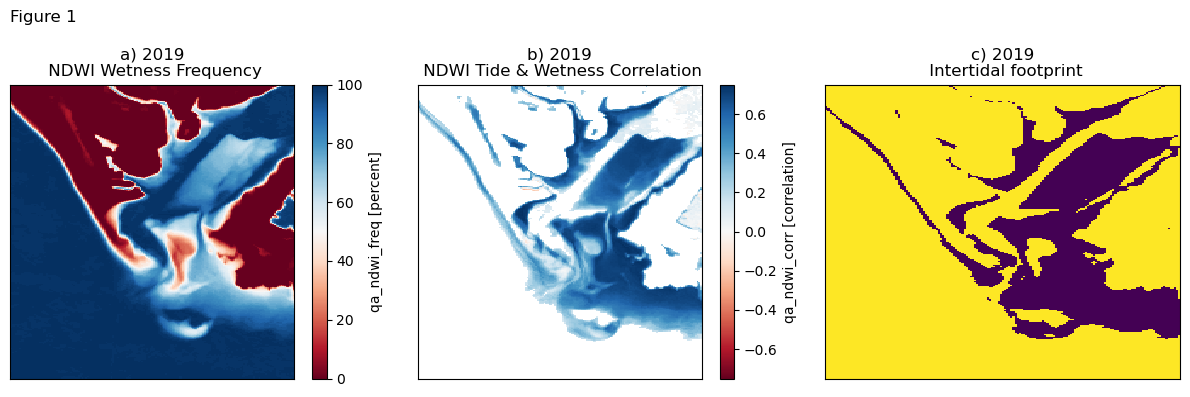

In [7]:
# Plot the NDWI wetness frequency and tidal correlations for 2019

# Setup the figure
fig, ax = plt.subplots(ncols=3, figsize=(12, 4))

# Identify a single timestep to inspect
time = "2019"

# Assign the datasets to the figure
ds.qa_ndwi_freq.sel(time=time).plot(cmap="RdBu", ax=ax[0])
ds.qa_ndwi_corr.sel(time=time).plot(ax=ax[1], cmap="RdBu")
ds.elevation.sel(time=time).isnull().plot(ax=ax[2], add_colorbar=False)

# Tidy up the axes
ax[0].tick_params(labelbottom=False, labelleft=False, left=False, bottom=False)
ax[1].tick_params(labelbottom=False, labelleft=False, left=False, bottom=False)
ax[2].tick_params(labelbottom=False, labelleft=False, left=False, bottom=False)
ax[0].set(xlabel=None, ylabel=None)
ax[1].set(xlabel=None, ylabel=None)
ax[2].set(xlabel=None, ylabel=None)

# Label the figure plots
ax[0].set_title("a) 2019\n NDWI Wetness Frequency")
ax[1].set_title("b) 2019\n NDWI Tide & Wetness Correlation")
ax[2].set_title("c) 2019\n Intertidal footprint")
fig.suptitle("Figure 1", x=0.04)

plt.tight_layout()

## Intertidal Elevation and Uncertainty

### Description

**DEA Intertidal Elevation** provides elevation in metre units relative to modelled Mean Sea Level for each pixel of the satellite-observed exposed intertidal zone across the Australian coastline.
The elevation model is generated from DEA Landsat and Sentinel-2 data surface reflectance from each three-year analysis period, utilising a pixel-based approach based on tide modelling. 
For every pixel, the time-series of surface reflectance data is converted to the Normalised Difference Water Index (NDWI), and each observation tagged with the tidal height modelled at the time of acquisition by the satellite. 
A rolling median is applied from low to high tide to reduce noise (e.g. white water, sunglint, non-tidal water level variability), then analysed to identify the tide height at which the pixel transitions from dry to wet. This tide height represents the elevation of the pixel. 

The companion dataset, **DEA Intertidal Elevation Uncertainty**, provides a measure of the quality of each modelled elevation value in metre units. Uncertainty is calculated by assessing how cleanly the modelled elevation separates satellite observations into dry and wet observations. This is achieved by identifying satellite observations that were misclassified by the modelled elevation (for instance, pixels that were observed as wet at tide heights lower than the modelled elevation, or alternately, observed as dry at higher tide heights). The spread of tide heights from these misclassified observations is summarised using a robust Median Absolute Deviation (MAD) statistic, and reported as `0.5 * MAD` to represent one-sided uncertainty bounds (i.e. ± uncertainty on either side of the pixel's elevation). Common causes of high elevation uncertainty can be poor tidal model performance, rapidly changing intertidal morphology, or noisy underlying satellite data.

#### Plot and view

In [8]:
# Inspect the elevation and uncertainty data for 2019
ds[["elevation", "elevation_uncertainty"]].sel(time=time)

<xarray.Dataset> Size: 313kB
Dimensions:                (time: 1, y: 232, x: 167)
Coordinates:
  * time                   (time) datetime64[ns] 8B 2019-07-02T11:59:59.999999
  * y                      (y) float64 2kB -2.822e+06 -2.822e+06 ... -2.824e+06
  * x                      (x) float64 1kB -1.828e+06 -1.828e+06 ... -1.827e+06
    spatial_ref            int32 4B 3577
Data variables:
    elevation              (time, y, x) float32 155kB nan nan nan ... nan nan
    elevation_uncertainty  (time, y, x) float32 155kB nan nan nan ... nan nan
Attributes:
    crs:           EPSG:3577
    grid_mapping:  spatial_ref

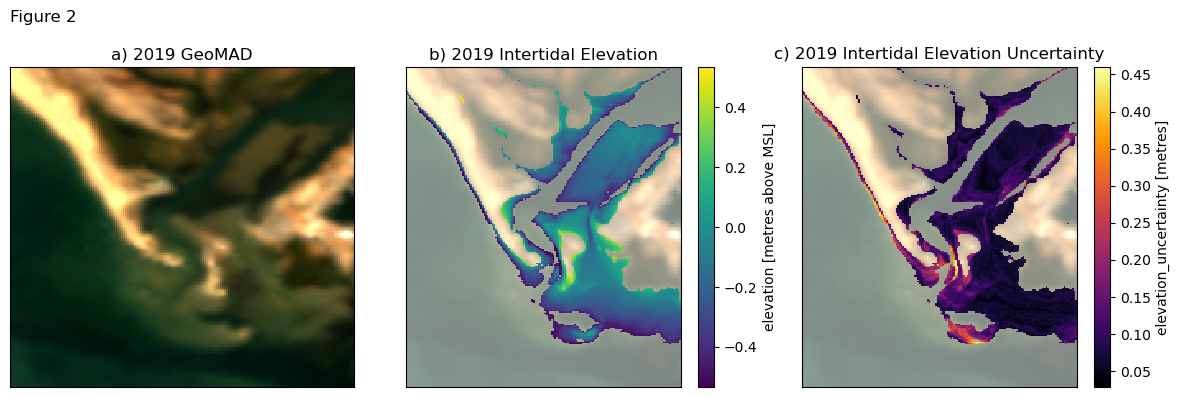

In [10]:
# Plot the intertidal elevation and uncertainty for 2019

# Setup the figure
fig, ax = plt.subplots(ncols=3, figsize=(12, 4))

# Assign the datasets to the figure
rgb(geomad_ds.sel(time=time), bands=["nbart_red", "nbart_green", "nbart_blue"], ax=ax[0])

rgb(geomad_ds.sel(time=time), bands=["nbart_red", "nbart_green", "nbart_blue"], ax=ax[1], alpha=0.5)
ds.elevation.sel(time=time).plot(ax=ax[1], cmap="viridis")

rgb(geomad_ds.sel(time=time), bands=["nbart_red", "nbart_green", "nbart_blue"], ax=ax[2], alpha=0.5)
ds.elevation_uncertainty.sel(time=time).plot(ax=ax[2], cmap="inferno")

# Tidy up the axes
ax[0].tick_params(labelbottom=False, labelleft=False, left=False, bottom=False)
ax[1].tick_params(labelbottom=False, labelleft=False, left=False, bottom=False)
ax[2].tick_params(labelbottom=False, labelleft=False, left=False, bottom=False)

ax[0].set(xlabel=None, ylabel=None)
ax[1].set(xlabel=None, ylabel=None)
ax[2].set(xlabel=None, ylabel=None)

# Label the figure plots
ax[0].set_title("a) 2019 GeoMAD")
ax[1].set_title("b) 2019 Intertidal Elevation")
ax[2].set_title("c) 2019 Intertidal Elevation Uncertainty")
fig.suptitle("Figure 2", x=0.04)

plt.tight_layout()


#### Interpretation

Figure 2a shows the median appearance of the location of interest during the time period.
Note though that tidal position is *not* factored into this image and is used here to provide context to the DEA Intertidal results only.

Figure 2b shows the intertidal elevation at this location for the period 2018 to 2020 (labelled as 2019). 
The spatial footprint of the intertidal area includes only pixels that are identified as intertidal with a high level of confidence ([Figure 1c](#Defining-the-Intertidal-Zone)).
Users of this data should also be aware that there is a satellite-observed bias in many locations against detection of the full astronomical tidal range by orbiting satellites such as Landsat and Sentinel-2.
The bias is introduced by regular daily satellite overpass times that fail to overlap with the timing of tides in the upper or lower tidal range.
Consequently, any satellite-derived intertidal dataset may be subject to incomplete mapping of the full tidal range. 
We have mapped the extent of these tidal biases and provide a relative measure of how completely our satellite-observed datasets observe the full astronomical tidal range.
For further discussion, see the [Tidal Observation Attributes section](#Tidal-Observation-Attributes).

Figure 2c shows the vertical uncertainty of the elevation measurements. Patterns in the uncertainty dataset reflect the relative stability of the pixel during the epoch with dynamic areas producing greater uncertainty values compared to stable sites.
Other patterns in the uncertainty data reflect the input image quality and quantity as well as the quality of the tidal modelling for any given location.

The elevation and uncertainty measurements are both reported in metres above sea level.

## Intertidal Exposure

### Description

**DEA Intertidal Exposure** models the percentage of time that any intertidal pixel of known elevation is exposed from tidal inundation.
Exposure is calculated by comparing the pixel elevation back against a high temporal resolution model of tide heights for that location, based on tide modelling.
Exposure percentage is calculated as the fraction of exposed observations relative to the total number of observations generated in the high temporal resolution tidal model for each 3-year analysis period.

#### Plot and view

In [11]:
# Inspect the exposure data for 2019
ds["exposure"].sel(time=time)

<xarray.DataArray 'exposure' (time: 1, y: 232, x: 167)> Size: 155kB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time         (time) datetime64[ns] 8B 2019-07-02T11:59:59.999999
  * y            (y) float64 2kB -2.822e+06 -2.822e+06 ... -2.824e+06 -2.824e+06
  * x            (x) float64 1kB -1.828e+06 -1.828e+06 ... -1.827e+06 -1.827e+06
    spatial_ref  int32 4B 3577
Attributes:
    units:         percent
    nodata:        255
    crs:           EPSG:3577
    grid_mapping:  spatial_ref

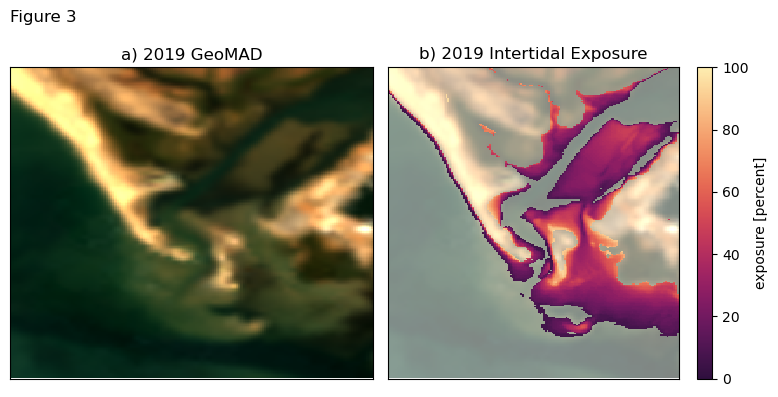

In [12]:
# Plot the intertidal exposure for 2019

# Setup the figure
fig, ax = plt.subplots(ncols=2, figsize=(8, 4))

# Assign the datasets to the figure
rgb(geomad_ds.sel(time=time), bands=["nbart_red", "nbart_green", "nbart_blue"], ax=ax[0])
rgb(geomad_ds.sel(time=time), bands=["nbart_red", "nbart_green", "nbart_blue"], ax=ax[1], alpha=0.5)
ds.exposure.sel(time=time).plot(ax=ax[1], cmap=cmocean.cm.matter_r, vmin=0, vmax=100)

# Tidy up the axes
ax[0].tick_params(labelbottom=False, labelleft=False, left=False, bottom=False)
ax[1].tick_params(labelbottom=False, labelleft=False, left=False, bottom=False)
ax[0].set(xlabel=None, ylabel=None)
ax[1].set(xlabel=None, ylabel=None)

# Label the figure plots
ax[0].set_title("a) 2019 GeoMAD")
ax[1].set_title("b) 2019 Intertidal Exposure")
fig.suptitle("Figure 3", x=0.06)

plt.tight_layout()

#### Interpretation

Figure 3a (2019 GeoMAD) shows the median appearance of the location of interest during the time period of interest, as in Figure 1a, and is used to contextualise the results in 3b.

Figure 3b shows Intertidal Exposure for the area of interest during the period 2018-2020 (labelled 2019). 
The intertidal exposure values represent the relative amount of time that each pixel was exposed from tidal inundation, as a percentage of all time during the three year period of interest.

The spatial footprint of the intertidal area includes only pixels that are identified as intertidal with a high level of confidence ([Figure 1c](#Defining-the-Intertidal-Zone)).
Although the relative distribution of values and patterns in the output Exposure dataset appears similar to Intertidal Elevation, Intertidal Exposure values account for patterns and astronomical influences on tidal processes across the entire analysis epoch at the location of interest.
These differences are usually most apparent at the highest and lowest ends of the modelled tide range.

Furthermore, depending on the location of interest, either or both of these tide-range extremas may be absent from the Intertidal Exposure dataset.
This data gap is caused by biases in the image acquisition of the full astronomical tidal range across Australia which varies with both latitude and longitude.
We have mapped the extent of these tidal biases and provide a relative measure of how completely our satellite-observed datasets observe the full astronomical tidal range.
For further discussion, see the [Tidal Observation Attributes section](#Tidal-Observation-Attributes).

## Tidal attributes

The DEA Intertidal Tidal Attributes (`ta`) are a suite of datasets that describe astronomical and satellite-observed tidal attributes, as well as some satellite-sensor specific behaviours that relate to every coastal pixel.
These datasets describe fundamental tidal characteristics for each pixel that both underpin DEA Intertidal workflows, and are important to understand for complete interpretation of all satellite-derived intertidal datasets.

The DEA Intertidal Tidal Attributes are grouped into two categories: the highest and lowest observed and astronomical tides, and satellite observed tidal offsets and spread metrics.

### Highest and lowest astronomical and satellite-observed tides

Highest and lowest astronomical and satellite-observed tide heights are foundational metadata that describe satellite and tidal processes around the coastline.
These datasets are used to produce the following satellite-observed tidal offset datasets which are useful to understand how tide heights are mapped around the coastline and to interpret satellite-derived intertidal datasets.

In this work, astronomical tide ranges are estimated from modelled tide heights generated by the ensemble tidal modelling workflow for each 3-year analysis period.

#### Description

The following four datasets characterise astronomical and observed tides:

| Variable name | Description |
| ---- | --- |
|ta_lot| The lowest observed tide dataset maps the lowest observed tide (LOT) of the satellite time-series at each pixel during the analysis epoch, based on ensemble tide modelling. |
|ta_hot| The highest observed tide dataset maps the highest observed tide (HOT) of the satellite time-series at each pixel during the analysis epoch, based on ensemble tide modelling. |
|ta_lat| The lowest astronomical tide dataset maps the lowest astronomical tide (LAT) for each pixel as modelled by the ensemble tide model for the analysis epoch. Note that the LAT modelled for the analysis epoch may differ from the LAT modelled across all-time for any given location. |
|ta_hat| The highest astronomical tide dataset maps the highest astronomical tide (HAT) for each pixel as modelled by the ensemble tide model for the analysis epoch. Note that the HAT modelled for the analysis epoch may differ from the HAT modelled across all-time for any given location. |

#### Plot and view

In [13]:
# Inspect the data for 2019
ds[["ta_lot", "ta_hot", "ta_lat", "ta_hat"]].sel(time=time)

<xarray.Dataset> Size: 623kB
Dimensions:      (time: 1, y: 232, x: 167)
Coordinates:
  * time         (time) datetime64[ns] 8B 2019-07-02T11:59:59.999999
  * y            (y) float64 2kB -2.822e+06 -2.822e+06 ... -2.824e+06 -2.824e+06
  * x            (x) float64 1kB -1.828e+06 -1.828e+06 ... -1.827e+06 -1.827e+06
    spatial_ref  int32 4B 3577
Data variables:
    ta_lot       (time, y, x) float32 155kB -0.6405 -0.6405 ... -0.6532 -0.6532
    ta_hot       (time, y, x) float32 155kB 0.7302 0.7302 ... 0.7306 0.7306
    ta_lat       (time, y, x) float32 155kB -0.8885 -0.8886 ... -0.8977 -0.8977
    ta_hat       (time, y, x) float32 155kB 0.8039 0.8039 ... 0.8066 0.8066
Attributes:
    crs:           EPSG:3577
    grid_mapping:  spatial_ref

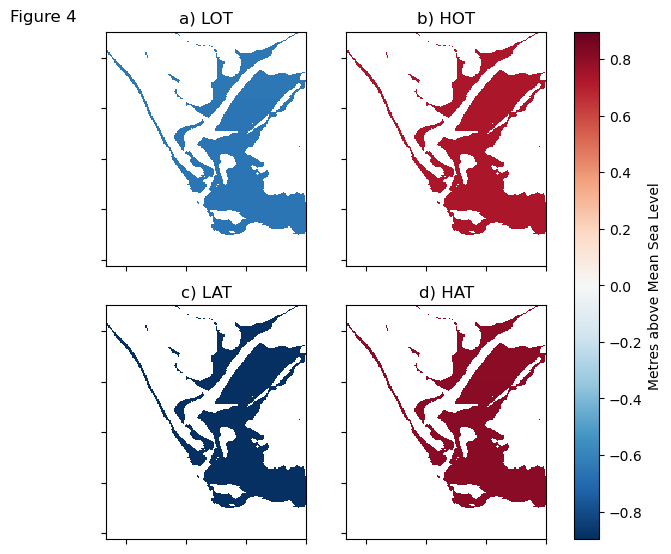

In [14]:
# Plot the data
fig = ds[["ta_lot", "ta_hot", "ta_lat", "ta_hat"]].where(
    ds.elevation.notnull()).sel(time=time).to_array().plot(col="variable",
                                                            col_wrap=2)

# Prepare the labels
fig.axs[0, 0].set_title("a) LOT")
fig.axs[0, 1].set_title("b) HOT")
fig.axs[1, 0].set_title("c) LAT")
fig.axs[1, 1].set_title("d) HAT")
fig.fig.suptitle("Figure 4", x=0.06)
fig.cbar.set_label("Metres above Mean Sea Level")

# Format the plot
for ax in fig.axs.flat:
    ax.label_outer()
    ax.set_xticklabels(labels="")
    ax.set_yticklabels(labels="")
    ax.set_xlabel("")
    ax.set_ylabel("")

#### Interpretation

Lowest and Highest Observed Tide heights (Figures 4 a-b) are calculated by attributing tide heights to all satellite observations over a location based on the time of image acquisition, and then identifying the lowest satellite-observed height (LOT, Figure 4a) and the highest satellite-observed height (HOT, Figure 4b) from the imagery stack. 
Conversely, Lowest and Highest Astronomical Tide heights (Figures 4 c-d) represent the minimum and maximum tide height for any location, based on the global tide modelling used in this work.
Users should note though that due to our epoch-based approach, all LOT, HOT, LAT and HAT values also represent the epoch only and are not representative of all-time values. 

Differences between astronomical and observed tide heights occur due to interactions between astronomical influences on tides and the regular overpass times of polar orbiting satellites. 
The overpass and image acquisition time of polar orbiting satellites is held constant to ensure maximum illumination with minimum atmospheric water vapor (haze and cloud build-up). 
The orbits of [Landsat 8 and Landsat 9](https://www.usgs.gov/faqs/what-are-acquisition-schedules-landsat-satellites) and [Sentinel-2](https://sentinels.copernicus.eu/web/sentinel/missions/sentinel-2/satellite-description/orbit) are scheduled with local overpass times of 10:00 a.m. to 10:30 a.m.
The regularity of these overpass times introduces biases to the range of tidal conditions that are imaged for any given location.
Local geography and astronomical influences on tide modelling ensure that the full range of modelled tides are rarely accounted for during these individual satellite overpasses (Figure 5).

The comparison of Highest and Lowest Observed Tide heights (HOT/LOT) against the Highest and Lowest Astronomical Tides (HAT/LAT) enables identification of intertidal locations where satellite observations of the tidal range are at odds with the modelled astronomical maxima/minima for the site.
These biases and offsets are quantified in further detail the following section.

### Satellite-observed tidal offsets and spread metrics
Satellite-observed tidal offsets and spread were introduced by [Bishop-Taylor et al (2019)](https://www.sciencedirect.com/science/article/pii/S0272771418308783) (Figure 5) to map biases in satellite coverage of the intertidal zone. 

#### Description

The DEA Intertidal product suite describes these variables in the following layers:

| Variable name | Description |
| ---- | --- |
| ta_spread| The tidal spread dataset provides the percentage of the full astronomical tidal range observed by the time series of satellite observations at each pixel (see Figure 1a). DEA Intertidal Spread takes the concept of satellite tide bias, introduced in Bishop-Taylor et al (2019) and applies it at a pixel scale to demonstrate the fraction of the full tide range that was sensor observed during the analysis epoch at that location. In this work, we define the astronomical tide range as that modelled by the ensemble tide modelling approach. |
| ta_offset_low | The low tide offset dataset quantifies the proportion of the lowest tides never observed by satellites at each pixel (as a percentage of the astronomical tide range). It is calculated by measuring the offset between the lowest astronomical tide (LAT) and the lowest satellite-observed tide (LOT; see figure 1b). A high value indicates that DEA Intertidal datasets may not map the lowest regions of the intertidal zone.  |
| ta_offset_high | The high tide offset dataset quantifies the proportion of the highest tides never observed by satellites at each pixel (as a percentage of the astronomical tide range). It is calculated by measuring the offset between the highest astronomical tide (HAT) and the highest satellite-observed tide (HOT; see Figure 1c). A high value indicates that DEA Intertidal datasets may not map the highest regions of the intertidal zone. |


![Figure 5](https://ars.els-cdn.com/content/image/1-s2.0-S0272771418308783-gr8.jpg) 
> **Figure 5** The distribution of Landsat observations relative to the full tidal range (after [Bishop-Taylor et al., 2019](https://www.sciencedirect.com/science/article/pii/S0272771418308783#sec3)). Light colours in the left panels indicate poor coverage of the tidal range by Landsat: light colours in (a) indicate polygons where Landsat observed a small ‘spread’ calculated as a proportion of the full tidal range. Light colours in (b) and (c) represent polygons where Landsat observations were biased away from low or high tides respectively. For example, a polygon with a spread of 0.7, a high tide offset of 0.05 and a low tide offset of 0.25 indicates that Landsat observed 70% of the tidal range, but did not image the highest 5% or lowest 25% of tide heights. 

#### Plot and view

In [15]:
# Inspect the data for 2019
ds[["ta_offset_high", "ta_offset_low", "ta_spread"]].sel(time=time)

<xarray.Dataset> Size: 468kB
Dimensions:         (time: 1, y: 232, x: 167)
Coordinates:
  * time            (time) datetime64[ns] 8B 2019-07-02T11:59:59.999999
  * y               (y) float64 2kB -2.822e+06 -2.822e+06 ... -2.824e+06
  * x               (x) float64 1kB -1.828e+06 -1.828e+06 ... -1.827e+06
    spatial_ref     int32 4B 3577
Data variables:
    ta_offset_high  (time, y, x) float32 155kB 4.0 4.0 4.0 4.0 ... 4.0 4.0 4.0
    ta_offset_low   (time, y, x) float32 155kB 14.0 14.0 14.0 ... 14.0 14.0 14.0
    ta_spread       (time, y, x) float32 155kB 80.0 80.0 80.0 ... 81.0 81.0 81.0
Attributes:
    crs:           EPSG:3577
    grid_mapping:  spatial_ref

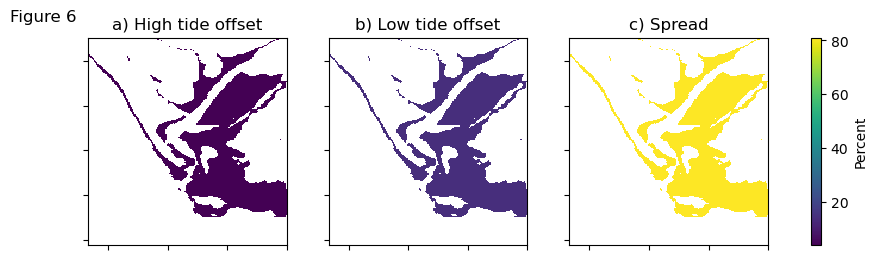

In [16]:
# Plot the data
fig = ds[["ta_offset_high", "ta_offset_low", "ta_spread"]].where(
    ds.elevation.notnull()).sel(time=time).to_array().plot(col="variable")

# Prepare the labels
fig.axs[0, 0].set_title("a) High tide offset")
fig.axs[0, 1].set_title("b) Low tide offset")
fig.axs[0, 2].set_title("c) Spread")
fig.fig.suptitle("Figure 6", x=0.06)
fig.cbar.set_label("Percent")

# Format the plot
for ax in fig.axs.flat:
    ax.set_xticklabels(labels="")
    ax.set_yticklabels(labels="")
    ax.set_xlabel("")
    ax.set_ylabel("")

#### Interpretation

Figure 6 represents a pixel-scale visualisation of metrics from [Figure 5](#Satellite-observed-tidal-offsets), comparing relative differences between astronomical and satellite-observed tide heights. 

Figure 6a considers the high tide offset - the relative difference between the highest observed and highest astronomical tide heights.
An offset of 10%, for example, indicates that the highest 10% of astronomical tides are not observed by the satellite at this location, for the time period of interest.
The lower the value, the more closely the highest satellite-observed tides match astronomical tides.

Similarly in Figure 6b, low values represent close alignment between the lowest satellite-observed and astronomical tides.

These two concepts are bought together in the measure of spread (Figure 6c).
The tidal spread is an indicator of the range of tide heights observed by satellites, as a percentage of the full astronomical range during the time period of interest.
A value of 80% for example, indicates that most of the astronomical tide range was imaged by satellites.

These datasets are intended to support the interpretation of DEA Intertidal datasets.
At the continental scale, it is envisioned that these tidal attribute datasets will support users to understand how comprehensively their areas of interest have been mapped and whether these datasets are suitable for their purposes.

Further exploration of these satellite tide bias concepts can be found in the [Tidal modelling notebook](https://knowledge.dea.ga.gov.au/notebooks/How_to_guides/Tidal_modelling/#Evaluating-tidal-biases-using-tidal_stats).

## Example application

We will now investigate a time-series application of the DEA Intertidal datasets to demonstrate how the datasets can be used.

Continuing to use the data already loaded, animations of the time-series will demonstrate the identification and monitoring of a sandbank breach that impacted an important  navigation channel in Carnarvon, Western Australia during 2017.
Upon completion of this case study, users can identify their own [area of interest](#Analysis-parameters) in this notebook, load, view and animate the time-series and then download GeoTIFF raster data files for continued use in your own local GIS environments.

### Carnarvon channel blockage 

The Fascine channel is a waterway bordering the Carnarvon townsite and the Gascoyne River. It is one of the Carnarvon’s key assets, linking the community to the coast.
In 2017, the sand spit that protected the channel entrance and maintained the connection to the outer channel breached due to wave action.
This triggered excessive siltation of the entrance, closing the waterway to most vessels, with minimum depths of less than half a metre at low tide.

Time-series mapping of elevations in the channel over this period show the constant re-working of the channel entrance by mobile sandbanks.
Time-series mapping of changes in intertidal exposure demonstrates the potential impact this had on local biodiversity, dependent upon intertidal habitats.

#### View the breach
Plot and view the breaching sandbank and consequent infilling of the Fascine Channel. 
Compare the annual median view of the location against the changing annual intertidal elevation and intertidal elevation uncertainty for the area.

In [18]:
# Generate the time-series animations for the imagery, intertidal elevation and intertidal elevation uncertainty datasets

# Animate the imagery changes
xr_animation(
    ds=geomad_ds,
    bands=["nbart_red", "nbart_green", "nbart_blue"],
    output_path="Carnarvon_Fascine_rgb_change_2016_to_2022.mp4",
    interval=1000,
    show_text="Figure 7a\n RGB",
    show_date="%Y",
    width_pixels=300,
);
plt.close()

# Animate the elevation changes
xr_animation(
    ds=ds,
    bands=["elevation"],
    output_path="Carnarvon_Fascine_elevation_change_2016_to_2022.mp4",
    interval=1000,
    imshow_kwargs={"cmap": "viridis"},
    show_text="Figure 7b\n Elevation",
    colorbar_kwargs={"colors": "black"},
    show_date="%Y",
    width_pixels=300,
);
plt.close()

# Animate the elevation uncertainty changes
xr_animation(
    ds=ds,
    bands=["elevation_uncertainty"],
    output_path=
    "Carnarvon_Fascine_elevation_uncertainty_change_2016_to_2022.mp4",
    interval=1000,
    imshow_kwargs={"cmap": "inferno"},
    show_text="Figure 7c\n Uncertainty",
    colorbar_kwargs={"colors": "black"},
    show_date="%Y",
    width_pixels=300,
);
plt.close()

Exporting animation to Carnarvon_Fascine_rgb_change_2016_to_2022.mp4


  0%|          | 0/7 (0.0 seconds remaining at ? frames/s)

Exporting animation to Carnarvon_Fascine_elevation_change_2016_to_2022.mp4


  0%|          | 0/7 (0.0 seconds remaining at ? frames/s)

Exporting animation to Carnarvon_Fascine_elevation_uncertainty_change_2016_to_2022.mp4


  0%|          | 0/7 (0.0 seconds remaining at ? frames/s)

In [19]:
# View the animations simultaneously

filepaths = [
    "Carnarvon_Fascine_rgb_change_2016_to_2022.mp4",
    "Carnarvon_Fascine_elevation_change_2016_to_2022.mp4",
    "Carnarvon_Fascine_elevation_uncertainty_change_2016_to_2022.mp4",
]

grid = GridspecLayout(1, len(filepaths))

for i, filepath in enumerate(filepaths):
    out = Output()
    with out:
        display.display(
            display.Video(filepath, embed=True,
                          html_attributes="loop autoplay"))
    grid[0, i] = out

grid

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

#### Interpretation

Multi-temporal time-series data from the DEA Intertidal product suite delivers the ability to track and monitor coastal change over time.

The RGB imagery (Figure 7a) shows exposed sandbanks as the brightest feature in the animation.
As the time-series progresses, the longest seaward sandbank is shown to breach and break up in 2017.
Over time, sediments are redeposited and reconfigured in the channel mouth area and the outer sandbank begins to lengthen again around 2021.

These changes in the intertidal sediment distributions are reflected in the intertidal elevation which is modelled in the central panel (Figure 7b).
Intertidal elevation uncertainty (Figure 7c) reflects the highly dynamic areas in the brightest colours as the largest uncertainties are attached to the most dynamic pixels.
The darkest regions are associated with low levels of uncertainty and are fairly stable across the time-series.

### Changes to the Carnarvon intertidal habitat

Carnarvon and adjacent coastal environments are located within the Gascoyne Coast Bioregion, a global hotspot for tropical reef endemism and the second most diverse marine environment in the world for tropical reef species [(fish.wa.gov.au).](https://www.fish.wa.gov.au/Documents/sofar/status_reports_of_the_fisheries_and_aquatic_resources_2015-16_gascoyne_bioregion.pdf)
The region boasts an extensive array of marine life including sharks, rays, turtles, dugongs and seabirds as well as significant stretches of habitat that include seagrass, reefs and mangroves.
The intertidal zone is a critical staging ground for the interaction between many of these species and habitats.
It is therefore essential to deeply understand the dynamics and characteristics of the intertidal zone to appropriately monitor and conserve threatened coastal species.

The Intertidal Exposure model offers an ecological perspective on the distribution of space within the intertidal zone.
Exposure time influences the species distribution of intertidal seagrasses (and consequently, turtle, dugong and ray distributions), foraging and roosting locations of seabirds, and even geochemical interactions.

#### View and quantify the changing intertidal area
In this example, the DEA Intertidal Exposure dataset will be used to explore the influence of exposure on potential intertidal habitat availability for wildlife in the area.

In [20]:
# Generate the time-series animations for the imagery, intertidal exposure and spread and offset attributes

# Animate the exposure changes
xr_animation(
    ds=ds,
    bands=["exposure"],
    output_path="Carnarvon_Fascine_exposure_change_2016_to_2022.mp4",
    interval=1000,
    imshow_kwargs={"cmap": cmocean.cm.matter_r, "vmin": 0, "vmax": 100},
    show_text="Figure 8b\n Exposure",
    colorbar_kwargs={"colors": "black"},
    show_date="%Y",
    width_pixels=300,
)
plt.close()

Exporting animation to Carnarvon_Fascine_exposure_change_2016_to_2022.mp4


  0%|          | 0/7 (0.0 seconds remaining at ? frames/s)

In [21]:
# View the animations simultaneously

filepaths = [
    "Carnarvon_Fascine_rgb_change_2016_to_2022.mp4",
    "Carnarvon_Fascine_exposure_change_2016_to_2022.mp4",
]

grid = GridspecLayout(1, len(filepaths))

for i, filepath in enumerate(filepaths):
    out = Output()
    with out:
        display.display(
            display.Video(filepath, embed=True,
                          html_attributes="loop autoplay"))
    grid[0, i] = out

grid

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

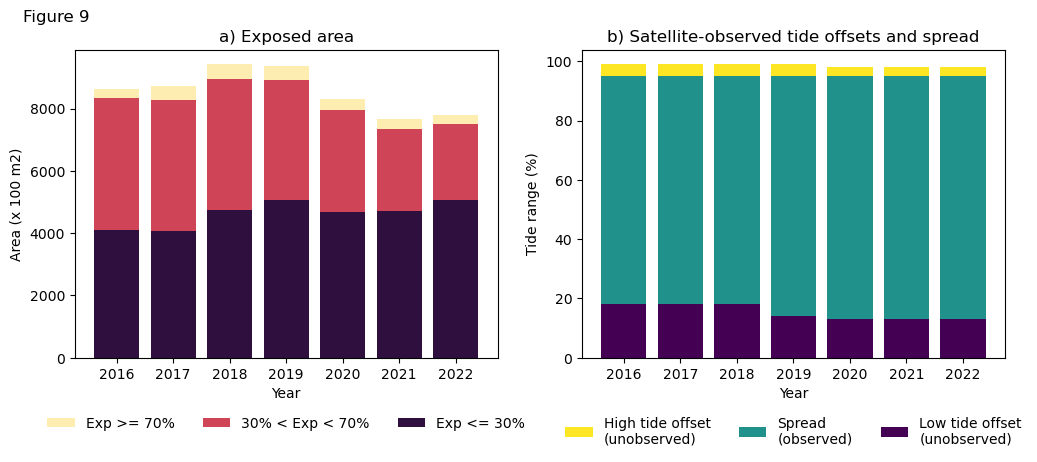

In [22]:
# Plot a summary of the changes in exposed area over time

# Prepare exposure data, grouping values based on exposure time
a = ds.exposure.count(dim=("x", "y")).values
b = ds.exposure.where(ds.exposure < 70).count(dim=("x", "y")).values
c = ds.exposure.where(ds.exposure <= 30).count(dim=("x", "y")).values

# Prepare offset and spread data, as the mean per year in the area of interest
spread = ds.time, ds.ta_spread.mean(dim=["x", "y"])
offl = ds.time, ds.ta_offset_low.mean(dim=["x", "y"])
offh = ds.time, ds.ta_offset_high.mean(dim=["x", "y"])

# Prepare the date range
dates = np.datetime_as_string(ds.time.values, unit="Y")

# Identify color schemes for each dataset
cmap = cmocean.cm.matter_r
cmap_offset = plt.cm.viridis

# Prepare the figures to plot side by side
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Plot the data
ax[0].bar(dates, a, label="Exp >= 70%", color=cmap(1.0))
ax[0].bar(dates, b, label="30% < Exp < 70%", color=cmap(0.5))
ax[0].bar(dates, c, label="Exp <= 30%", color=cmap(0.0))

ax[1].bar(
    dates,
    offh[1] + spread[1] + offl[1],
    label="High tide offset\n(unobserved)",
    color=cmap_offset(1.0),
)
ax[1].bar(dates,
          spread[1] + offl[1],
          label="Spread\n(observed)",
          color=cmap_offset(0.5))
ax[1].bar(dates,
          offl[1],
          label="Low tide offset\n(unobserved)",
          color=cmap_offset(0.0))

# Prepare the legends
ax[0].legend(loc="upper center",
             ncol=3,
             bbox_to_anchor=(0.5, -0.15),
             frameon=False)
ax[1].legend(loc="upper center",
             ncol=3,
             bbox_to_anchor=(0.5, -0.15),
             frameon=False)

# Prepare the labels
ax[0].set_ylabel("Area (x 100 m2)")
ax[0].set_xlabel("Year")
ax[1].set_ylabel("Tide range (%)")
ax[1].set_xlabel("Year")

# Set the figure subtitles
ax[0].set_title("a) Exposed area")
ax[1].set_title("b) Satellite-observed tide offsets and spread")

# Set the plot title
fig.suptitle("Figure 9", x=0.11)

plt.show()

#### Interpretation

Like the other datasets in the DEA Intertidal product suite, the multi-temporal DEA Intertidal Exposure dataset can by used to compare landscape changes over time.

The DEA Intertidal Exposure animation (Figure 8b), comparing the changing distribution of intertidal exposure patterns over time, demonstrated the dynamicism of this case study area and that the total observable intertidal area in this region is in flux.

In Figure 10, regional summaries quantify the changes in the animation (Figure 8b).
Figure 10a broadly classifies the intertidal area into high exposure regions (exposed for 70% of the time or more), medium exposure (exposed between 30% and 70% of the time) and low exposure regions (exposed 30% of the time or less).
Summarising the area occupied by these regions over time (Figure 9a), there was a small increase in the proportion of the low exposure region, following the sandbank breach in 2017.
Conversely, in the years following 2019, there was a decrease in the total area of both the medium exposed intertidal zone as well as the overall intertidal area, while the total area of high exposure remained fairly consistent over time.

To support the interpretation of DEA Intertidal Exposure, whose extrema values are closely linked to satellite observations of the top and bottom of the tidal frame, Figure 9b summarises potential satellite-observed biases across the region, as measured by the high and low tide offset and spread metrics.
Although the high tide offset was fairly uniform at this location across the time-series, there was a small decrease in the low tide offset from 2019 onward, meaning that satellites observed more of the lower tide range in recent years than previously. This was associated with a small increase in the overall spread of tide range observed by satellites.

However, the continuing environmental changes in the Carnarvon channel region (Figure 7a) were significantly more influential on the exposure patterns of the intertidal zone during this time-series than the underlying tidal characteristics (Figure 9b).
It is important to remember that the epochs reported in DEA Intertidal are a composite of overlapping 3-year analysis periods and that the influence of the sandspit breakthrough in 2017 may be more noticeable in the following 2018 timestep.
It is therefore probable that the detected changes in the exposed intertidal zone during 2016 to 2022 were caused by the mobilisation and redistribution of sediments in the Carnarvon Fascine channel area.
As sediments were eroded from the medium exposed proportion of the intertidal zone, they were likely redistributed at lower elevations resulting in an increase in the area of low exposure.
Similarly, the overall decrease in the area of intertidal zone over the time series is likely due to the transport and loss of sediment out of the Carnarvon system. 

### Export the data

To download the data you've been exploring in this notebook in a cloud-optimised GeoTIFF format, run the following cell.
As the dataset contains multiple years of data, a for-loop is used which will export each timestep as a single GeoTIFF file, named by the date of the timestep and downloadable by right clicking on the files in the folder from which you opened this notebook.

This example code exports Exposure data only; this can be changed by editing the `band = "exposure"` line below.

In [23]:
band = "exposure"

for i in range(len(ds.time)):

    # We will use the date of the satellite image to name the GeoTIFF
    date = ds.isel(time=i).time.dt.strftime("%Y").data
    print(f"Writing {date} for band {band}")

    # Select the individual timestep as a xr.DataArray
    singletimestamp_da = ds[band].isel(time=i)

    # Write GeoTIFF
    write_cog(geo_im=singletimestamp_da, fname=f"{date}.tif", overwrite=True)

Writing 2016 for band exposure
Writing 2017 for band exposure
Writing 2018 for band exposure
Writing 2019 for band exposure
Writing 2020 for band exposure
Writing 2021 for band exposure
Writing 2022 for band exposure


***

## Additional information

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Digital Earth Australia data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

**Contact:** If you need assistance, please post a question on the [Open Data Cube Slack channel](http://slack.opendatacube.org/) or on the [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) using the `open-data-cube` tag (you can view previously asked questions [here](https://gis.stackexchange.com/questions/tagged/open-data-cube)).
If you would like to report an issue with this notebook, you can file one on [Github](https://github.com/GeoscienceAustralia/dea-notebooks).

**Last modified:** April 2024

**Compatible datacube version:** 

In [24]:
print(datacube.__version__)

1.8.18


## Tags